# Lecture 5 - Experimental Design, Performance Measures for Regression Tasks, Cross-validation Schemes & The Curse of Dimensionality

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

In [ ]:
# Generate input samples and desired values
N_train = 70 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.5 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true fct
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

plt.figure(figsize=(10,5))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

In [ ]:
def PolynomialRegression(x,t,M):
    '''Fit a polynomial of order M to the data input data x and desire values t.
    MSE objective function.'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T # this creates an N-by-(M+1) matrix
    
    # Compute the solution for the parameters w, using the MSE ojective function
    w = np.linalg.inv(X.T@X)@X.T@t 
    
    # Compute model prediction
    y = X@w
    
    return w, y

def PolynomialRegression_test(x_test, w):
    '''Use a trained linear regression model with polynomial features for inference.'''
    # Compute test feature matrix
    X_test = np.array([x_test**i for i in range(len(w))]).T # this is a N_test-by-(M+1) matrix
    
    # Prediction for test samples using the trained model
    y_test = X_test@w
    
    return y_test

def PolynomialRegression_reg(x,t,M,lam):
    '''Fit a polynomial of order M to the data input data x and desire values t. 
    MSE objective function with the Ridge regularizer.'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(M+1)]).T # this creates an N-by-(M+1) matrix
    
    # Compute the solution for the parameters w, using the MSE ojective function
    w = np.linalg.inv(X.T@X + lam*np.eye(M+1))@X.T@t 
    
    # Compute model prediction
    y = X@w
    
    return w, y

In [ ]:
M = 15
lam = 0.001

w, y = PolynomialRegression(x_train,t_train,M) 
w_reg, y_reg = PolynomialRegression_reg(x_train,t_train,M,lam) 

fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,t_train, label='Training Data')
plt.plot(x_train,y,'r', label = 'Polynomial Regression')
plt.plot(x_train,y_reg, 'b',label = 'Polynomial Regression w/ Regularizer')
plt.plot(x_true,t_true,'--g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

# Performance Measures for Regression Tasks

In order to determine if the model is able to **generalize** to a **validation set**, we need to determine a **performance measure**.

Which measures would you use to compare model performances?

1. Error measures are always a good start for **regression** tasks. Some examples include:

    * Mean Squared Error (MSE) - best when the data does not have outliers. The MSE will penalize outliers heavily.

    * Mean Absolute Error (MAE) - best when you suspect data has outliers.
    
    * Normalized mean squared error (NMSE).
    
    * Normalized mean absolute error (NMAE).

2. Coefficient of Determination $r^2$
    * Advantage: it is bounded between $[0,1]$, where values closer to 1 indicate a better prediction.
    
3. Quantile-Quantile plot (or Q-Q plot)

    * Qualitative measurement of the model predictions vs the target values.
    * The Q-Q plot is used to answer the following questions:
        * Do two data sets come from populations with a common distribution?
        * Do two data sets have common location and scale?
        * Do two data sets have similar distributional shapes?
        * Do two data sets have similar tail behavior?

In [ ]:
## Predictions in training/test sets with and without regularization
y = PolynomialRegression_test(x_train, w)
y_test = PolynomialRegression_test(x_test, w)

y_reg = PolynomialRegression_test(x_train, w_reg)
y_test_reg = PolynomialRegression_test(x_test, w_reg)

## Error Measures
# Residual error for Training data for polynomial regression without and with regularizer
error_train = t_train - y 
error_train_reg = t_train - y_reg 

# Residual error for Test data for polynomial regression without and with regularizer
error_test = t_test - y_test
error_test_reg = t_test - y_test_reg

# Error Measures
print('Mean Squared Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(error_train**2))
print('With regularizer: ', np.mean(error_train_reg**2),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(error_test**2))
print('With regularizer: ', np.mean(error_test_reg**2),'\n')
print('----------------------------------------------------------------')
print('Mean Absolute Error \n')
print('Training Set')
print('Without regularizer: ', np.mean(np.abs(error_train)))
print('With regularizer: ', np.mean(np.abs(error_train_reg)),'\n')
print('Test Set')
print('Without regularizer: ', np.mean(np.abs(error_test)))
print('With regularizer: ', np.mean(np.abs(error_test_reg)),'\n')

In [ ]:
## R2-SCORE

# it measures how much variance in one variance is explained by another variable 

from sklearn.metrics import r2_score

print('Test set without regularization:', ##)

print('Test set with regularization:', ##)

The coefficient of determination $r^2$ is bounded between $[0,1]$. The closer to 1, the closer the predictions are to the target value.

In [ ]:
## QUANTILES



# median

In [ ]:


# minimum

In [ ]:


# maximum

In [ ]:
# Histograms of RV samples

plt.hist(t_train, alpha=0.5, label='Target')
plt.hist(y, alpha=0.5, label='Pred. w/out reg.')
plt.hist(y_reg, alpha=0.5, label='Pred. w/ reg.')
plt.legend();

In [ ]:
# Q-Q plot

plt.scatter(np.quantile(t_train, np.linspace(0,1,len(t_train))), 
           np.quantile(y, np.linspace(0,1,len(t_train))))
plt.xlabel('True Quantiles')
plt.ylabel('Predicted Quantiles')
plt.title('Q-Q Plot');

In [ ]:
# alternative way to plot the Q-Q plot

plt.scatter(np.sort(t_train), np.sort(y));

In [ ]:
base = np.linspace(min(t_train)-0.1,max(t_train)+0.1,100)
plt.plot(base,base,'r')
plt.scatter(np.sort(t_train), np.sort(y))
plt.xlabel('True Quantiles')
plt.ylabel('Predicted Quantiles')
plt.title('Q-Q Plot');

In [ ]:
print('R2 Score for Training without regularizer:', ##)

print('R2 Score for Test without regularizer:', ##)

In [ ]:
print('R2 Score for Training with regularizer:', ##)

print('R2 Score for Test with regularizer:', ##)

In practice, we consider a good fit if the $r^2$ of the Q-Q plot if **greater than 0.9**, ideally >0.99.

## Other Performance Measures

Performance of an algorithm can be determined using a variety of statistical goodness-of-fit measures. 

* For regression tasks this includes error-based measurements, hypothesis tests, Q-Q plots.
* For classification tasks this includes error rate, accuracy, ROC curves, performance-recall curves.

But it can also be in terms of:
1. Risk,
2. Training time,
3. Training storage/memory,
4. Testing time,
5. Testing storage/memory,
6. Interpretability, namely, whether the method allows knowledge extraction which can be checked and validated by experts, and
7. computational complexity.

---

# Strategies to Mitigate Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

---

# Cross-Validation

The goal of **cross-validation**, or CV, is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

Cross-validation allows us to determine the values for the hyperparameter that provide the most **generalization**. Cross-validation mitigates the occurrrence of overfitting, but it does not eliminate it entirely.

Suggested reading: 

* [Sections 19.1-19.6](https://ufl.instructure.com/courses/455013/external_tools/412362?display=borderless) from the Alpaydin textbook 
* [Section 5.3 Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the "Python Data Science Handbook" textbook.

## Strategies of Experimentation - Fine-Tuning Hyperparameters

To fully test a system, you want to try to evaluate each of these parameters separately. However, this is often not easily done.

A few strategies for fine-tuning hyperparameters include:

* Best guess
* One factor at a time
* Factorial design or **grid search**
* Randomized search

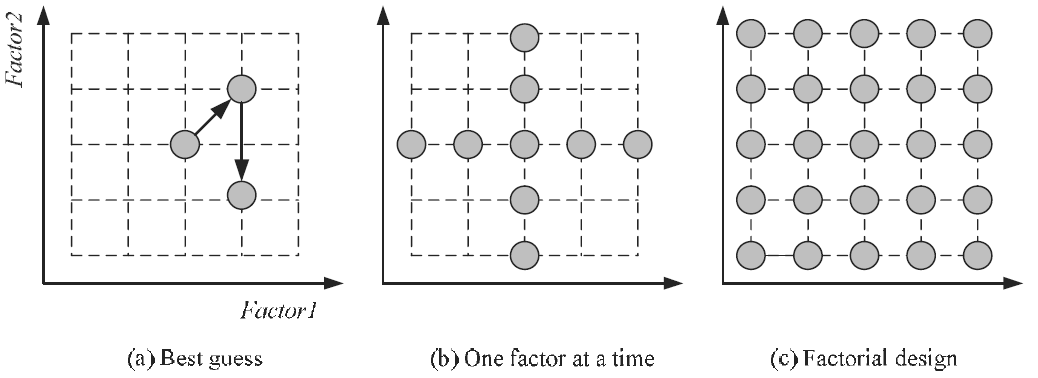

In [1]:
from IPython.display import Image
Image('figures/Experimentation.png',width=800)
# Source: Alpaydin, E. (2014) Introduction to Machine Learning. 3rd edition, MIT Press.

We first must select a **performance measure**, e.g. mean square error (MSE), coefficient of determination $r^2$. There are different strategies for implementing cross-validation:

1. $k\times 2$ cross-validation
2. k-fold cross-validation
3. Leave-One-Out cross-validation
4. Stratified cross-validation

We also need to make sure that classes are represented in the right proportions when subsets of data are held out, not to disturb the class prior probabilities; this is called **stratiﬁcation**. If a class has 20 percent examples in the whole dataset, in all samples drawn from the dataset, it should also have approximately 20 percent examples.

## $1\times 2$ cross-validation

Let's consider the case, where we only have a single validation set which resulted from splitting the training data into a training set and a validation set with splitting rations 70% and 30% respectively.

In [ ]:
from sklearn.model_selection import train_test_split

x_train2, x_validation, t_train2, t_validation = train_test_split(x_train, t_train, 
                                                                  test_size=0.3,
                                                                  shuffle=True,
                                                                 random_state=0)

x_train2.shape, x_validation.shape, t_train2.shape, t_validation.shape

Let's now vary the values for $M$ and estimate the associated coefficients $\mathbf{w}$ using the training set. Then, let's evaluate performance measure (e.g. MSE) in both training and validation sets:

In [ ]:
# Range of values for M
M_vals = range(1,11)

perf_train = []
perf_val = []
for M in M_vals:
    
    # Train the model (without regularization for simplicity of illustration)
    w, y_train = PolynomialRegression(x_train2, t_train2, M)
    
    # Make predictions for the training and validation sets
    y_validation = PolynomialRegression_test(x_validation, w)
    
    # Performance Measure (MSE)
    perf_train += [np.mean(t_train2-y_train)**2]
    perf_val += [np.mean(t_validation-y_validation)**2]
    
# Plotting results
plt.figure(figsize=(10,3))
plt.plot(M_vals, perf_train, '-og',label='Training Set')
plt.plot(M_vals, perf_val, '-or',label='Validation Set')
plt.legend(fontsize=15)
plt.xlabel('Model order, $M$', size=12)
plt.ylabel('Performance Measure', size=12);

## K-Fold Cross-Validation

The technique of k-fold cross-validation, illustrated below for the case of $k=4$, involves taking the available data and partitioning it into $k$ groups (in the simplest case these are of equal size). Then $k-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $k$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the runs are then averaged.

$K$ is typically 10 or 30. As $K$ increases, the percentage of training instances increases and we get more robust estimators, but the validation set becomes smaller. Furthermore, there is the cost of training the classiﬁer $K$ times, which increases as $K$ is increased. As $N$ increases, $K$ can be smaller; if $N$ is small, $K$ should be large to allow large enough training sets.

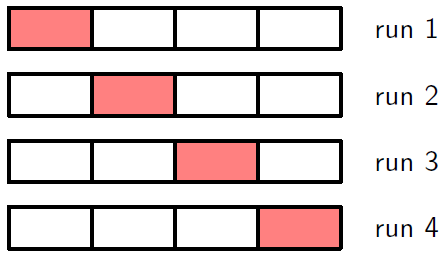

In [2]:
Image('figures/Kfold CV.png',width=400)

In [ ]:
from sklearn.model_selection import KFold

KFold?

**Goal:** find the best value for the **hyperparameters** $M$ (model order) and $\lambda$ (regularization trade-off parameter).

Let's use **4-fold cross-validation** on this data:

In [ ]:
k = 4 # number of folds

kf = KFold(n_splits=k,shuffle=True, random_state=0)
kf

In [ ]:
# Split training feature matrix into training and validation sets

f=1
for train_index, validation_index in kf.split(x_train):
    print('Fold ', f)
    print('The training set has ', train_index.shape[0],' samples')
    print('Their index locations are: ', train_index)
    print('The validation set has ', validation_index.shape[0],' samples')
    print('Their index locations are: ', validation_index,'\n')
    f+=1

In [ ]:
from sklearn.metrics import r2_score

# Set of values for lambda to explore
M_vals = np.array(range(2,11))
lam_vals= np.arange(0.01,1.1,0.01)

avg_train = np.zeros((len(M_vals), len(lam_vals)))
avg_valid   = np.zeros((len(M_vals), len(lam_vals)))

for i in range(len(M_vals)):
    for j in range(len(lam_vals)):
    
        M   = M_vals[i]
        lam = lam_vals[j]
        print('M Value = ',M)
        print('Lambda Value = ',lam)
    
        # For each training/validation split
        f=1
    
        #initialize performance measures
        perf_train_avg, perf_val_avg = 0, 0
    
        for train_index, validation_index in kf.split(x_train):
            print('\nFold ',f)
    
            # Select training set using the indices found from kf.split
            x_train2, x_validation = x_train[train_index], x_train[validation_index]
    
            # Select validation set using the indices found from kf.split
            t_train2, t_validation = t_train[train_index], t_train[validation_index]
    
            # Training model with training set
            w, y_train = PolynomialRegression_reg(x_train2, t_train2, M, lam)
    
            # Evaluate trained model in validation set
            y_val = PolynomialRegression_test(x_validation, w)
    
            # Performance Measure (r^2 score of predictions)
            perf_train = r2_score(t_train2,y_train) #np.mean((t_train2-y_train)**2)
            perf_val   = r2_score(t_validation, y_val) #np.mean((t_validation-y_val)**2)
    
            # Average performance measure
            perf_train_avg = perf_train_avg + perf_train
            perf_val_avg = perf_val_avg + perf_val
            print('Performance Training = ', perf_train)
            print('Performance Validation = ', perf_val)
            f+=1

        # Average Performance
        avg_train[i,j] = perf_train_avg/k
        avg_valid[i,j] = perf_val_avg/k

        print('\nAverage Performance in Training = ', avg_train[i,j])
        print('Average Performance in Validation = ', avg_valid[i,j])
        print('-----------------------------------------------------\n')

In [ ]:
##################

# Note that we should be looking for the minimum MSE (not the maximum!)

best_m_val, best_lam_val = np.where(avg_valid==np.max(avg_valid))

print('Best M value = ', M_vals[best_m_val])
print('Best lambda value = ', lam_vals[best_lam_val])

## Refit the Model

Once the optimal hyperaparameters have been identified, the final model is trained using **all of the training data** (including the samples previously used for validation).

In [ ]:
w, y_train = PolynomialRegression_reg(x_train, t_train, M_vals[best_m_val][0], lam_vals[best_lam_val][0])
y_test = PolynomialRegression_test(x_test, w)

fig=plt.figure(figsize=(10,5))
plt.scatter(x_train,t_train, label='Training Data')
plt.scatter(x_test,t_test, c='r', marker='^', label='Test Data')
plt.plot(x_train,y_train,'--r', label = 'Polynomial Regression')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend(bbox_to_anchor=(1.5, 1),fontsize=12,ncol=1)
plt.xlabel('Data Samples, $x$', fontsize=20)
plt.ylabel('Desired Labels, $t$', fontsize=20);

In [ ]:
print('Training r2-score:', r2_score(t_train, y_train))
print('Test r2-score:', r2_score(t_test, y_test))

#### Discussion

* We select the set of hyperparameters $\{M,\lambda\}$ with the best performance score (e.g. smallest MSE or largest $r^2$).

* If the value of the hyperparameter falls at the edge of provided range of values, it is appropriate to expand the range of values for further exploration.

* Other performance measures can be used, for example, the coefficient of determination of the Q-Q plot for regression tasks, or accuracy score for classification tasks.

---

## Leave-One-Out Cross-Validation

One extreme case of cross-validation is the **leave-one-out** where given a dataset of $N$ instances, only one instance is left out as the validation set (instance) and training uses the $N − 1$ instances. We then get $N$ separate pairs by leaving out a different instance at each iteration. This is typically used in applications such as medical diagnosis, where labeled data is hard to ﬁnd. Leave-one-out **does not permit stratiﬁcation**.

---

<div class="alert alert-info">
    <b>The No Free Lunch Theorem</b> 

The No Free Lunch Theorem states that there is no single learning algorithm that in any domain always induces the most accurate learner. The usual approach is to try many and choose the one that performs the best on a separate validation set.
    
For any learning algorithm, there is a dataset where it is very accurate and another dataset where it is very poor. When we say that a learning algorithm is good, we only quantify how well its inductive bias matches the properties of the data.
</div>

---

# The Curse of Dimensionality

The Curse of Dimensionality illustrates various phenomena that arise when we work with high-dimensional data spaces that would not otherwise occur in lower-dimensional settings (such as the 3-dimensional space).

> ## Our intuitions do not hold in high-dimensional spaces 🤔

Let's illustrate this with two examples.

## Example 1: Volume of a Crust

Consider two embedded spheres, $S_1$ and $S_2$, where sphere $S_1$ has radius $r$, sphere $S_2$ has radius $r-\epsilon$, with $0<\epsilon<r$.

Let's calculate the ratio between the volume of the crust and the volume of the outer sphere $S_1$:

\begin{align*}
\text{ratio} = \frac{V_{crust}}{V_{S_1}} = \frac{V_{S_1} - V_{S_2}}{V_{S_1}}
\end{align*}

* The $D$-dimensional [volume of a sphere of radius $r$ in $D$-dimensional space](https://en.wikipedia.org/wiki/Volume_of_an_n-ball) is: $V = \frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}$, then

\begin{align*}
\text{ratio} &= \frac{V_{S_1} - V_{S_2}}{V_{S_1}} \\
&= 1-\frac{V_{S_2}}{V_{S_1}} \\
&= 1-\frac{\frac{(r-\epsilon)^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}}{\frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}} \\
&= 1 - \frac{(r-\epsilon)^D}{r^D}\\
&= 1 - \frac{r^D\left(1-\frac{\epsilon}{r}\right)^D}{r^D}\\
&= 1 - \left(1-\frac{\epsilon}{r}\right)^D
\end{align*}

* For a fixed value for $\epsilon$, a fixed radius $r$ and $\epsilon<r$, what happens as $D$ increases?

In [ ]:
# Crust volume between spheres with epsilon different radii and increasing dimensionality

r = 1 # radius of outer sphere
eps = 0.001 # epsilon value
D = range(1,10000) # dimensionality
RatioVol = [1-(1-eps/r)**d for d in D] # ratio of the volume as a function of dimensionality D
plt.plot(D, RatioVol) # plotting results
plt.ylabel('ratio$=1 - (1 - \epsilon/r)^D$',size=15)
plt.xlabel('(Feature Space) Dimensionality, D',size=15);

> ### 🤯 Let's see another example!

## Example 2: Unit Porcupine

Consider the unit porcupine which is represented as a unit hypersphere inscribed within a unit hypercube.

Recall that the $D$-dimensional volume of a $D$-dimensional cube with radius $r$ is $(2r)^D$.

* What happens to the ratio between the volume of the sphere and the volume of the cube as dimensionality $D$ increases?

\begin{align*}
\frac{V(\text{sphere})}{V(\text{cube})} &= \frac{\frac{r^D \pi^{\frac{D}{2}}}{\Gamma\left(\frac{D}{2}+1\right)}}{(2r)^D}\\
&= \frac{r^D \pi^{\frac{D}{2}}}{(2r)^D\Gamma\left(\frac{D}{2}+1\right)}\\
&= \frac{\pi^{\frac{D}{2}}}{2^D\Gamma\left(\frac{D}{2}+1\right)}
\end{align*}

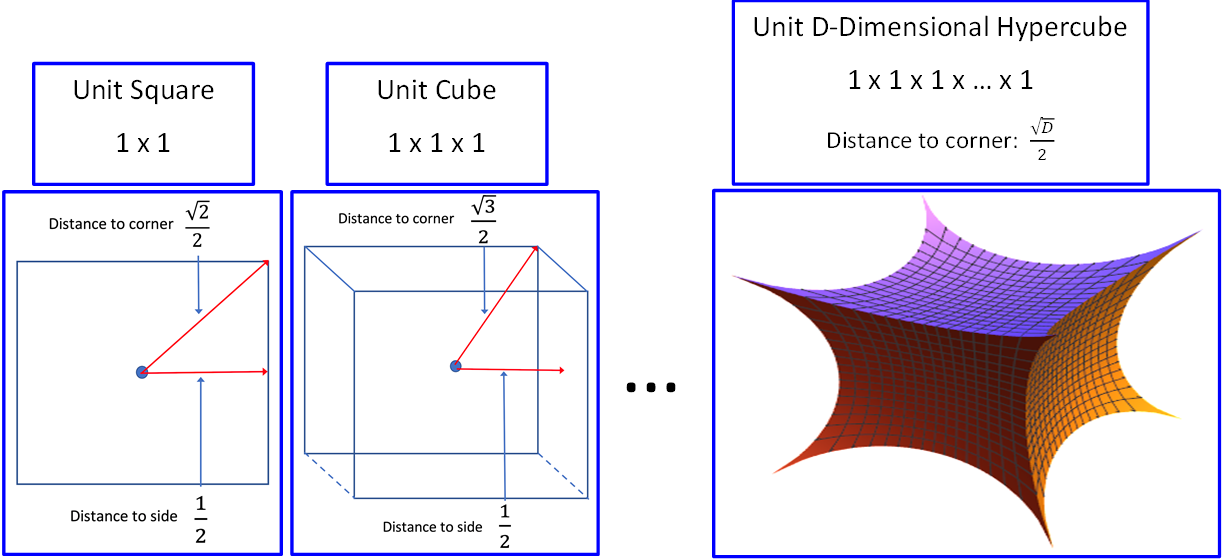

In [3]:
Image('figures/hypercube.png',width=1000)

In [ ]:
# The Unit Porcupine (the unit hyper-sphere inscribed within the unit hyper-cube)

import math

D = range(1,100) # dimensionality, D
V = [np.pi**(i/2)/(2**i*math.gamma(i/2 + 1)) for i in D] # ratio as a function of dimensionality D
dist_to_Corner = [math.sqrt(d)/2 for d in D] # distance 

# plotting
plt.figure(figsize=(15,5))
plt.subplot(1,2,1); plt.plot(D, V) 
plt.title('Ratio of Volume',size=15)
plt.xlabel('Dimensions, D',size=15)

plt.subplot(1,2,2)
plt.plot(D, dist_to_Corner) 
plt.title('Distance to Corner of the Cube',size=15)
plt.xlabel('Dimensions, D',size=15);

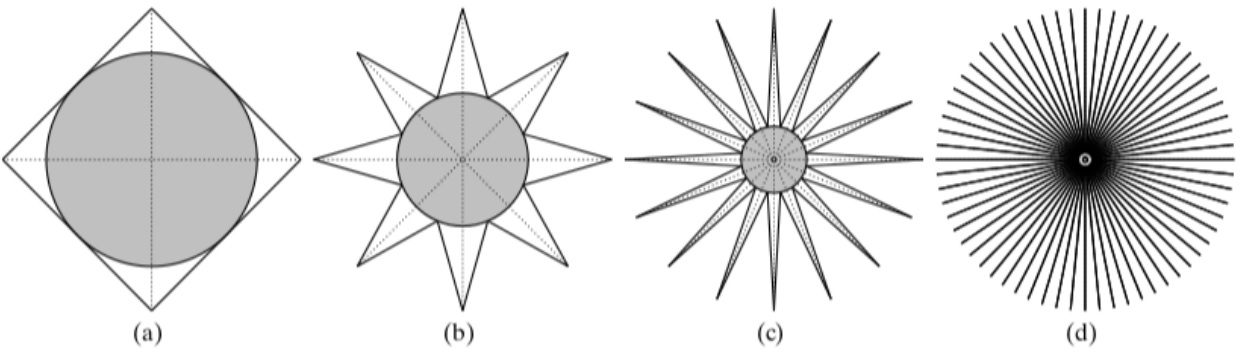

In [4]:
Image('figures/Unit Porcupine.jpg',width=800)

## Discussions

In the unit porcupine example, for higher-dimensionality $D$, all of the volume will reside in the "corners". So, distances between neighboring points is extremely large. The notion of **similarity** as measure by distances becomes a challenge.

As the dimensionality of the feature space increases, we need exponentially more data in order to explain a highly increasing volume.

We need to be careful choosing a model as that choice "injects" what we want the data to look like or follow a specific behavior. For example, in higher-dimensions, the tails of a Gaussian density function will become highly dense.

Always employ the **Occam's Razor** principle: the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider a model to be complex if it has too many hyperparameter values to configure. 

When we are in a high-dimensional input space (such as images), much of that space is empty. The input data can be represented in only a few *degrees of freedom* of variability. We say that the data in *embedded* in a **manifold** of equal dimensionality as the degrees of freedom (which is drastically smaller than the input space dimensionality). We will study a few dimensionality reduction and manifold learning techniques later on in this course.

And again, intuitions or assumptions do not always hold in higher dimensions.

---
---
---

# Bayesian Interpretation

## Bayesian Interpretation of the Least  Squares Estimator ($\hat{\mathbf{w}}$)

We have seen some deﬁnitions of common estimators and analyzed their properties. But where did these estimators come from? Rather than guessing that some function might make a good estimator and then analyzing its bias and variance, we would like to have some principle from which we can derive specific functions that are good estimators for different models.

Let's try to understand this better. Consider the objective function:

\begin{align*}
J(\mathbf{w}) &= \frac{1}{2}\sum_{i=1}^N \left(t_i - y(\phi(x_i),\mathbf{w})\right)^2
\end{align*}

where $\mathbf{y}(\phi(\mathbf{x}),\mathbf{w})$ is a model representation (e.g., linear regression), and $\phi(x)$ is a feature mapping function (e.g. Gaussian Basis functions).

The most common such principle is the **maximum likelihood** principle. Consider a set of $N$ examples $\mathbf{x}=[x_1,x_2,\dots,x_N]^T$ drawn independently from the true but unknown data-generating distribution $p_{\text{data}}(x)$.

Let $p_{\text{model}}(\phi(x);\mathbf{w})$ be a parametric family of probability distributions over the same space indexed by $\mathbf{w}$. In other words, $p_{\text{model}}(\phi(x);\mathbf{w})$ maps any conﬁguration $\phi(x)$ to a real number estimating the true probability $p_{\text{data}}(\phi(x))$.

The maximum likelihood estimator for $\mathbf{w}$ is then deﬁned as:

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}}\max p_{\text{model}}(\phi(\mathbf{x}); \mathbf{w}) \\
&= \arg_{\mathbf{w}}\max \prod_{i=1}^N p_{\text{model}}(\phi(x_i); \mathbf{w}) 
\end{align*}

This product over many probabilities can be inconvenient for various reasons. For example, it is prone to numerical underﬂow. To obtain a more convenient but equivalent optimization problem, we observe that taking the logarithm of the likelihood does not change its arg max but does conveniently transform a product.

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}}\max \sum_{i=1}^N \log p_{\text{model}}(\phi(x_i); \mathbf{w}) 
\end{align*}

Because the arg max does not change when we rescale the cost function, we can divide by $N$ to obtain a version of the criterion that is expressed as an expectation with respect to the empirical distribution $p_{\text{data}}$ deﬁned by the training data:

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}}\max \mathbb{E}_{\phi(x)\sim \hat{p}_{\text{data}}} \left[\log p_{\text{model}}(\phi(x_i); \mathbf{w})\right]
\end{align*}

## Log-Likelihood and the Least Squares Solution

The maximum likelihood estimator can readily be generalized to estimate a conditional probability $P(\mathbf{t}|\phi(\mathbf{x}); \mathbf{w})$ in order to predict $t$ given $\phi(x)$. This is actually the most common situation because it forms the basis for most supervised learning. If $\mathbf{x}$ represents all our inputs and $\mathbf{t} all our observed targets, then the conditional maximum likelihood estimator is

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}} \max P(\mathbf{t} | \phi(\mathbf{x}); \mathbf{w})
\end{align*}

If the examples are assumed to be i.i.d., then this can be decomposed into

\begin{align*}
\mathbf{w}_{\text{MLE}} &= \arg_{\mathbf{w}} \max \sum_{i=1}^N \log P(t_i | \phi(x_i); \mathbf{w})
\end{align*}

# Least Squares Solution of Linear Regression as the Maximum Likelihood Estimation (MLE) of $\mathbf{w}$

Linear regression with the least squares objective function may be justified as a maximum likelihood procedure. Previously, we motivated linear regression as an algorithm that learns to take a feature input $\phi(x)$ and produce an output value $y$. The mapping from $\phi(x)$ to $y$ is chosen to minimize the mean squared error, a criterion that we introduced more or less arbitrarily. 

We now revisit linear regression from the point of view of maximum likelihood estimation. Instead of producing a single prediction $y$, we now think of the model as producing a conditional distribution $p(\mathbf{t}|\phi(\mathbf{x}))$. We can imagine that with an infinitely large training set, we might see several training examples with the same input value $\phi(\mathbf{x})$ but different values of $\mathbf{t}$. The goal of the learning algorithm is now to fit the distribution $p(t|\phi(x))$ to all those different $t$ values that are all compatible with $\phi(x)$. To derive the same linear regression algorithm we obtained before, we define $p(t|\phi(x)) = \mathcal{N}\left(t; f(\phi(\mathbf{x});\mathbf{w}), \sigma^2\right)$. The function $f(\phi(\mathbf{x});\mathbf{w})$ gives the prediction of the mean of the Gaussian. 

In this example, we assume that the variance is fixed to some constant $sigma^2$ chosen by the user. We will see that this choice of the functional form of $p(\mathbf{t}|\phi(\mathbf{x}))$ causes the maximum likelihood estimation procedure to yield the same learning algorithm as we developed before. Since the examples are assumed to be i.i.d., the conditional log-likelihood is given by

\begin{align*}
\mathcal{L} = \log p(t_i | \phi(x_i); \mathbf{w}) &= -N\log\sigma -\frac{N}{2}\log(2\pi)-\sum_{i=1}^N\frac{(t_i-y_i)^2}{2\sigma^2}
\end{align*}

---

## Complete Derivation

Let's see how we can arrive at this same solution from a different perpective:

\begin{align*}
\arg_{\mathbf{w}} \min J(\mathbf{w}) &= \arg_{\mathbf{w}} \max - J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right)\\
&= \arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\sum_{i=1}^N \left(t_i - y_i\right)^2\right)\\
&= \arg_{\mathbf{w}} \max \prod_{i=1}^N\exp\left(-\frac{1}{2} \left(t_i - y_i\right)^2\right)\\
&\propto \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)
\end{align*}

Recall that the univariate Gaussian pdf is defined as: $\mathcal{N}(x; \mu, \sigma^2) \sim \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{1}{2}\frac{(x-\mu)^2}{\sigma^2}\right)$.

Applying our "trick", the natural logarithm:

\begin{align*}
\arg_{\mathbf{w}} \max & \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\\
\propto & \arg_{\mathbf{w}} \max \ln \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\\
= & \arg_{\mathbf{w}} \max \sum_{i=1}^N \ln \mathcal{N}\left(t_i;y_i,1\right)
\end{align*}

We can expand the last term as:

\begin{align*}
\sum_{i=1}^N \ln \mathcal{N}\left(t_i;y_i,1\right) &= \sum_{i=1}^N \ln \left( \frac{1}{\sqrt{2\pi}} \exp\left\{-\frac{1}{2} (t_i-y_i)^2 \right\} \right)\\
&= \sum_{i=1}^N -\frac{1}{2}\ln(2\pi) - \frac{1}{2}(t_i-y_i)^2\\
&= -\frac{N}{2} -\sum_{i=1}^N \frac{1}{2}(t_i-y_i)^2
\end{align*}

The next step to find the arg $\mathbf{w}$ that maximizes this log-likelihood is to take the derivative of this function with respect to (w.r.t.) $\mathbf{w}$, set it to 0 and solve for $\mathbf{w}$.

If we consider the special case of a linear regression model, we have: $y_i = \sum_{j=0}^M w_jx_i^j = \mathbf{w}^T\phi(x_i)$, where $\phi(x)$ is the polynomial basis function. Hence:

\begin{align*}
\mathcal{L} &= -\frac{N}{2} -\sum_{i=1}^N \frac{1}{2}(t_i-\mathbf{w}^T\phi(x_i))^2\\
&= -\frac{N}{2} - \frac{1}{2} \Vert \mathbf{t} - \mathbf{X}\mathbf{w}\Vert^2_2
\end{align*}

As before, if we take the derivative

\begin{align*}
\frac{\partial\mathcal{L}}{\partial\mathbf{w}}=0
\end{align*}

We will arrive at the same solution:

\begin{align*}
\mathbf{w}_{\text{MLE}} &= (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}
\end{align*}

---

## Ridge Regression as Maximum A Posteriori (MAP)

**How can we interpret the optimization problem when we consider a regularization term (ridge or lasso) in the objective function?**

Consider 

\begin{align*}
J(\mathbf{w}) = \frac{1}{2}\sum_{i=1}^N (t_i - y_i)^2 + \frac{\lambda}{2}\sum_{j=0}^M w_j^2
\end{align*}

As before, we have 

\begin{align*}
\arg_{\mathbf{w}} \min J(\mathbf{w}) &= \arg_{\mathbf{w}} \max - J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right)\\
&= \arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\sum_{i=1}^N \left(t_i - y_i\right)^2 - \frac{\lambda}{2} \sum_{j=0}^M w_j^2\right)\\
&= \arg_{\mathbf{w}} \max \prod_{i=1}^N\exp\left(-\frac{1}{2} \left(t_i - y_i\right)^2\right)\prod_{j=0}^M\exp\left(-\frac{\lambda}{2} w_j^2\right)\\
&\propto \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\prod_{j=0}^M \mathcal{N}\left(w_j;0, \frac{1}{\lambda}\right)\\
&= \arg_{\mathbf{w}} \max p(\mathbf{t}| \mathbf{y}(\mathbf{x};\mathbf{w})) p(\mathbf{w}| \lambda)\\
&\propto \arg_{\mathbf{w}} \max p(\mathbf{w}| \mathbf{t})
\end{align*}

We see that adding a regularization penalty term to the objective function is equivalent to adding a prior probability on the parameters. 

For the ridge penalty, the probabilistic model of the prior probability is a Gaussian distribution with mean 0 and variance $1/\lambda$. 

## Lasso Regression as Maximum A Posteriori (MAP)

Consider 

\begin{align*}
J(\mathbf{x};\mathbf{w}) = \frac{1}{2}\sum_{i=1}^N (t_i - y_i)^2 + \frac{\lambda}{2}\sum_{j=0}^M |w_j|
\end{align*}

As before, we have 

\begin{align*}
\arg_{\mathbf{w}} \min J(\mathbf{w}) &= \arg_{\mathbf{w}} \max - J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right)\\
&= \arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\sum_{i=1}^N \left(t_i - y_i\right)^2 - \frac{\lambda}{2} \sum_{j=0}^M |w_j|\right)\\
&= \arg_{\mathbf{w}} \max \prod_{i=1}^N\exp\left(-\frac{1}{2} \left(t_i - y_i\right)^2\right)\prod_{j=0}^M\exp\left(-\frac{\lambda}{2} |w_j|\right)\\
&\propto \arg_{\mathbf{w}} \max \prod_{i=1}^N \mathcal{N}\left(t_i;y_i,1\right)\prod_{j=0}^M \mathcal{L}\text{aplacian}\left(w_j;0, \frac{1}{\lambda}\right)\\
&= \arg_{\mathbf{w}} \max p(\mathbf{t}| \mathbf{y}(\mathbf{x};\mathbf{w})) p(\mathbf{w}| \lambda)\\
&\propto \arg_{\mathbf{w}} \max p(\mathbf{w}| \mathbf{t})
\end{align*} 

For the lasso penalty, the probabilistic model of the prior probability is a Laplacian distribution with parameters $\mu=0$ and $b = 1/\lambda$. 

Recall that the Laplacian pdf has two parameters, $\mu$ and $b$ ($b>0$), and its function is defined as: $\mathcal{L}\text{aplacian}(\mu, b) \sim \frac{1}{2b}\exp\left\{-\frac{|x-\mu|}{b}\right\}$.

---

In [ ]:
import scipy.stats as stats

x = np.linspace(-10,10,1000)

lam = 0.1

G = stats.norm(0, np.sqrt(1/lam))
L = stats.laplace(0, np.sqrt(1/lam))

plt.figure(figsize=(10,7))
plt.plot(x, G.pdf(x), '--', label='Ridge: $\mathcal{N}(\mu=0,\sigma^2=1/\lambda)$')
plt.plot(x, L.pdf(x), label='Lasso: $\mathcal{L}(\mu=0,b=1/\lambda)$')
plt.legend(loc='best', fontsize=15); plt.xlabel('$\mathbf{w}$', size=15)
plt.ylabel('$P(\mathbf{w})$', size=15); plt.title('Prior Probability',size=15);

---

# Maximum Likelihood Estimation (MLE) & Maximum A Posteriori (MAP)

<h2 align="center"><span style="color:blue">Maximum Likelihood Estimation (MLE)</span></h2>
<center>(Frequentist approach)</center>

In **Maximum Likelihood Estimation** (also referred to as **MLE**) we want to *find the set of parameters* that **maximize** the data likelihood $P(\mathbf{t}|\mathbf{y}(\mathbf{x};\mathbf{w}))$. We want to find the *optimal* set of parameters under some assumed distribution such that the data is most likely.

<h2 align="center"><span style="color:orange">Maximum A Posteriori (MAP)</span></h2>
<center>(Bayesian approach)</center>

In **Maximum A Posteriori** (also referred as **MAP**) we want to *find the set of parameters* that **maximize** the posterior probability $P(\mathbf{w}|\mathbf{t})$. We want to find the *optimal* set of parameters under some assumed distribution such that the parameters are most likely to have been drawn off of given some prior beliefs.

## Illustration Example

**Suppose you flip a coin 3 times. Let $H_i$ be the event that we observe Heads on flip $i$. Consider the event $E=H_1\cap H_2\cap H_3$, i.e. all flips were Heads. What is the probability that the next flip is Heads?**

From classical probability (frequentist), we look only at data to compute the probability of flipping Heads:

\begin{align*}
P(H) = \frac{\text{No. of observed Heads}}{\text{No. of flips}} = \frac{3}{3} = 1
\end{align*}

From Bayesian statistics, we use Bayesian inferencing: What is the **hidden state** in this problem?

* Hidden state: what type of coin was use in the experiment
* Let's assume that we think only two types of coins could have been used, one fair coin and one 2-headed coin. So, by the **Law of Total Probability**:

\begin{align*}
P(H) = P(H|\text{fair})P(\text{fair}) + P(\overline{H}|\text{2-headed})P(\text{2-headed})
\end{align*}

Furthermore, we can test different hypothesis by checking which hypothesis has the largest posterior probability value, e.g. if $P(\text{fair}|E) > P(\text{2-headed}|E)$, then hypothesis "fair" is more likely and that is what we will use to make predictions.
    
Note that the events $H_i$ are **conditionally independent**, that is: $P(H_1\cap H_2|\text{fair}) = P(H_1|\text{fair})P(H_2|\text{fair})$.

## MLE and MAP Solutions

Let's assign heads to the numerical value 1 and tails to 0. The sample space is $S=\{0,1\}$. Let $X$ be the discrete random variable (R.V.) that describes the outcome of flipping a coin. Furthermore, let the probability of heads ($x=1$) be equal to some *unknown* value $\mu$. The probability mass function (pmf) of this R.V. is defined as:

\begin{align*}
p(x|\mu) = \begin{cases} \mu & \text{if } x=1 \\ 1-\mu & \text{if }x=0\\ 0 & \text{otherwise}  \end{cases}
\end{align*}

* This is the **Bernoulli** discrete R.V.. The mean and variance (1st and 2nd moment) of the Bernoulli distribution are: $E[x] = \mu$ and $E[\left(x- E[x]\right)^2] = \mu(1-\mu)$.

* So, for every outcome of the event $E$, we will model it using a Bernoulli distribution, and each outcome is pairwise **conditionally independent**. Therefore, we have the event $E$ contains i.i.d. outcomes.

### Maximum Likelihood (MLE) Estimator

For simplicity of calculation, let $E=x_1\cap x_2\cap \dots\cap x_N$, where $x_i=\{0,1\}$ (0 for Tails and 1 for Heads). Then, for an experiment with $N$ samples, we can write the **data likelihood** as:

\begin{align*}
P(\mathbf{x}|\mu) &= P(x_1\cap x_2\cap \dots\cap x_N|\mu) \\
&= P(x_1|\mu)P(x_2|\mu)\dots P(x_N|\mu) \\
&= \prod_{n=1}^N p(x_n|\mu) \\
&= \prod_{n=1}^N \mu^{x_n} (1-\mu)^{1-x_n}
\end{align*}

Now, we are interested in finding the value of $\mu$ given a set of samples $\mathbf{x}=\{x_i\}_{i=1}^N$. 

To optimize the data likelihood, we can apply the natural logarithm function to simplify:

\begin{align*}
arg_\mathbf{\mu} \max P(\mathbf{x}|\mu) &= \arg_\mathbf{\mu} \max \ln \left( P(\mathbf{x}|\mu) \right)
\end{align*}

where

\begin{align*}
\mathcal{L} &= \ln \left( P(\mathbf{x}|\mu) \right) = \sum_{n=1}^N \left(x_n \ln(\mu) + (1-x_n)\ln(1-\mu)\right)
\end{align*}

So now we can take the derivative of this function with respect to (w.r.t.) $\mu$ and equal it to zero:

\begin{align*}
\frac{\partial \mathcal{L}}{\partial \mu} &= 0\\
(1-\mu)\sum_{n=1}^N x_n - \mu \left(N - \sum_{n=1}^N x_n\right) &= 0 \\
\sum_{n=1}^N x_n - \mu\sum_{n=1}^N x_n - \mu N + \mu\sum_{n=1}^N x_n &= 0 \\
\sum_{n=1}^N x_n - \mu N &= 0 \\
\mu_{\text{MLE}} &= \frac{1}{N} \sum_{n=1}^N x_n
\end{align*}

As expected, the MLE estimation for the probability of seeing heads in the next coin flip is equal to the **relative frequency** of the outcome heads.

* Suppose you flipped the coin only once, and saw Tails. The probability of flipping Heads according to MLE would be 0.

* MLE is **purely data driven**! This is sufficient *when* we have lots and lots of data.

---

Next class... derive for the Maximum A Posteriori (MAP) Estimator!

---